In [1]:
import numpy as np
import pandas as pd
import functools

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

import datetime
import sys
import logging
# logging.basicConfig(
#     level=logging.INFO, 
#     format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
#     handlers=[
#         logging.FileHandler(filename='read_file.log'),
#         logging.StreamHandler(sys.stdout)
#     ]
# )
timestamp = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')
filename=f'./tmp/read_data_{timestamp}.log'
formatter = logging.Formatter('[%(asctime)s] %(name)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s')

file_handler = logging.FileHandler(filename=filename, mode='a+')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setLevel(logging.INFO)

# The handlers have to be at a root level since they are the final output
logging.basicConfig(
    level=logging.DEBUG, 
    format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
    handlers=[
        file_handler,
        stream_handler
    ]
)
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.basicConfig(level=logging.DEBUG,format='%(asctime)s %(levelname)s:%(message)s')


In [2]:
graph_path = r'./graph'

Sintaxis para un decorador:

```bash
def numerov(debug = False,*args,**kwargs):
    __name__ = "Numerov's Integration Method function wrapper"
    def decorator(f_aux):
        def wrapper(*dargs,**dkwargs):
            ...
            return final_df
        return wrapper
    return decorator
```

In [72]:
def read_file(func):
    logging.debug('\n\n\n')

    def wrap_histo(histo):
        logging.debug(f'\nLa variable "histo" dentro del wrapper es: {histo[1:-2]}')
        logging.debug(f'\nEl tipo de la variable "histo" dentro del wrapper es: {type(histo[1:-2])}')
        return [float(i) for i in histo[1:-2].split(';')]

    @functools.wraps(func)
    def wrapper(*args):

        # 1.- Tenemos que cargar los datos en un DataFrame
        df = func(*args)

        # 2.- Vamos a preparar la columna "histo" para poder leerla.

        logging.debug(df['histo'])
        logging.debug(f'\nEl tipo de los elementos de la columna "histo" es: {type(df["histo"][0])}')
        df['histo'] = df['histo'].apply(wrap_histo)
        # new_histo = [float(i) for i in histo[0][1:-2].split(';')]
        # logging.debug(df['histo'][])
        # new_histo_0 = wrap_histo(df['histo'][0])
        logging.debug(df['histo'])

        return df

    return wrapper

In [73]:
@read_file
def read_excel(path):
    return pd.read_excel(path)

In [74]:
df_test = read_excel(r'./data/Arreglado.xlsx')

```bash
    with graph_path+r'/test' as graph_i_path:
        fig, ax = plt.subplots()

        for i in df_test.index:
            ax.hist(df_test['histo'][i])
            plt.savefig(graph_i_path+f'{i}.png')
            ax.clear()
```

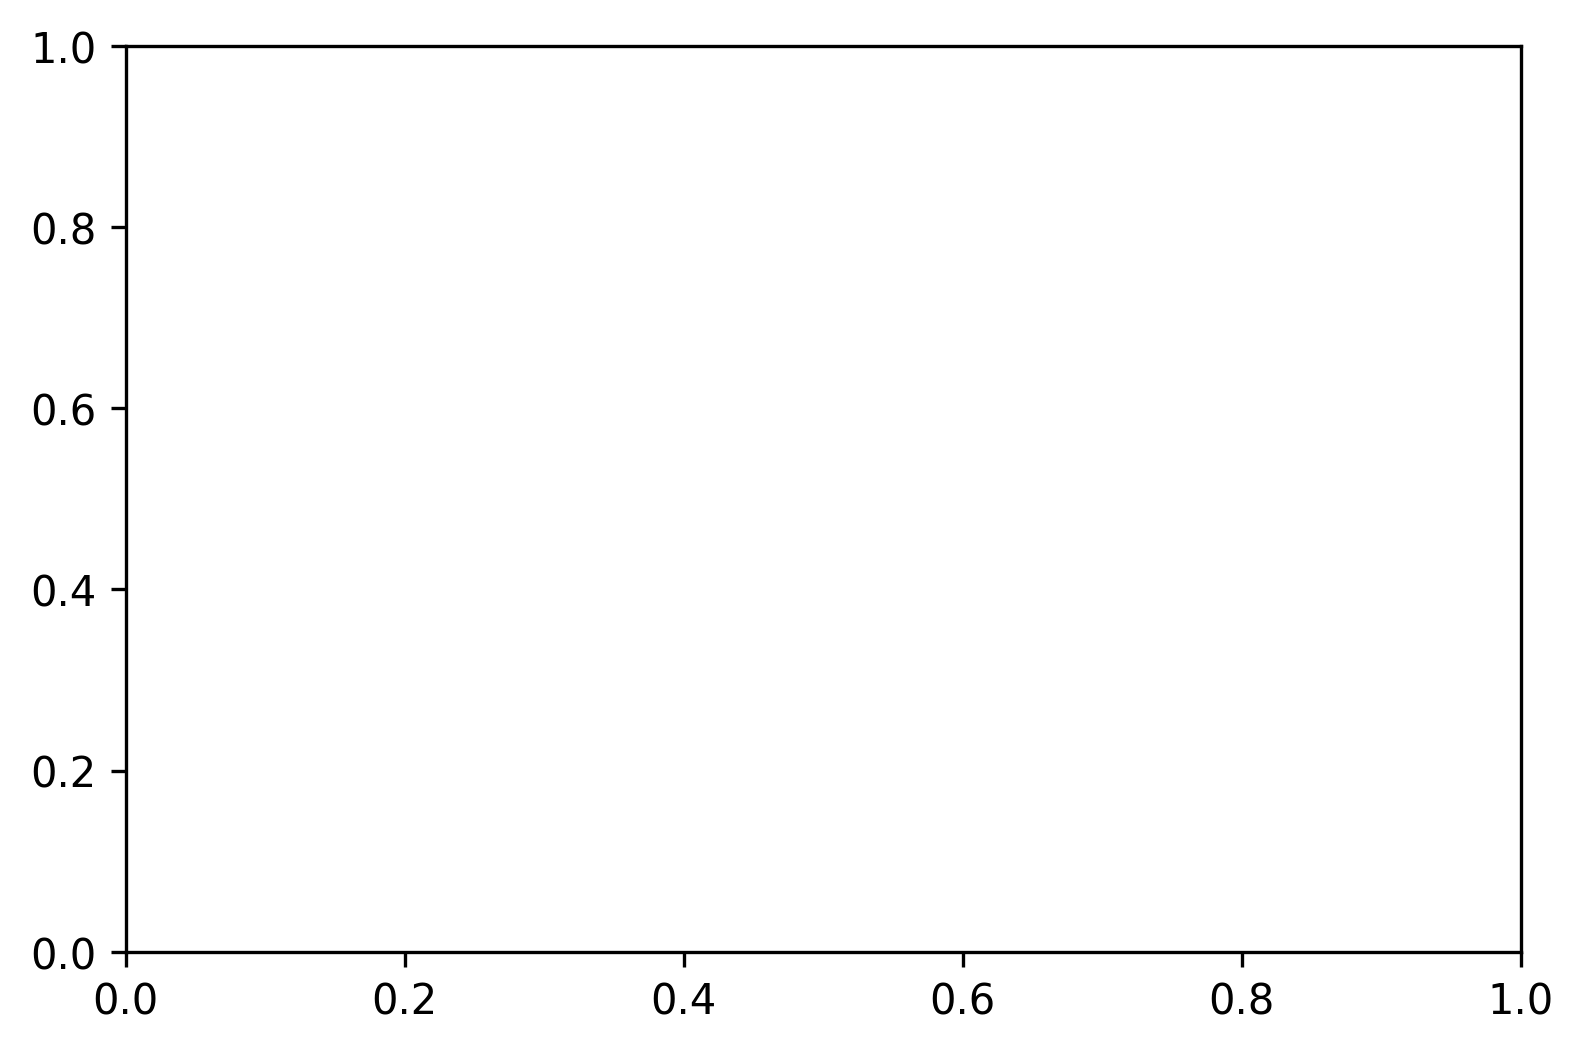

In [78]:
graph_i_path = graph_path+r'/test'
fig, ax = plt.subplots()

for i, hist_i in enumerate(df_test['histo']):
    ax.hist(hist_i)
    plt.savefig(graph_i_path+f'/{i}.png')
    ax.clear()